In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sentence_transformers import SentenceTransformer


c:\Users\dileo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv("_films_reviews_1.csv", usecols=["film_name", "username", "rating", "review_text"])

combined = df.groupby("film_name").agg({
    "review_text": lambda texts: " ".join(str(t) for t in texts),
    "rating": "mean" 
}).reset_index()

mean_rating = combined["rating"].mean()

combined["above_avg"] = (combined["rating"] > mean_rating).astype(int)

X = combined["review_text"]
y = combined["above_avg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [ ]:
model = make_pipeline(
    CountVectorizer(lowercase=True,strip_accents="unicode",stop_words="english"),
    TfidfTransformer(),
    LogisticRegressionCV() #remember ridge by default
    #implmement other categorical features through categorical encoder
)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3962
           1       0.74      0.72      0.73      3674

    accuracy                           0.74      7636
   macro avg       0.74      0.74      0.74      7636
weighted avg       0.74      0.74      0.74      7636




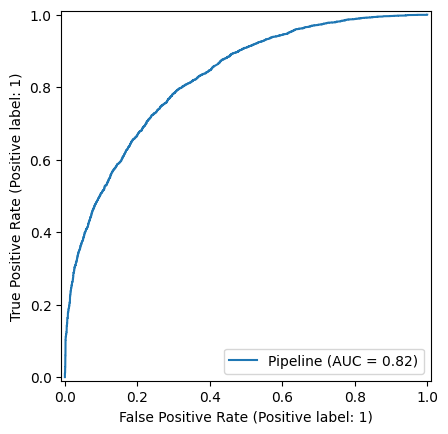

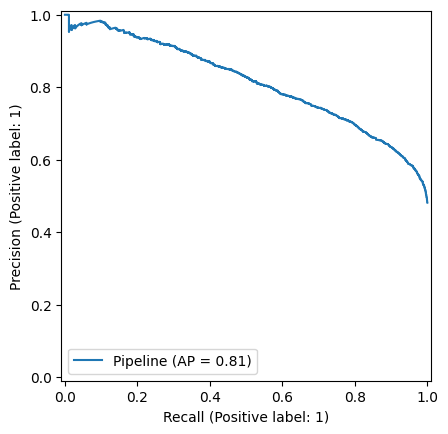

In [11]:

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

RocCurveDisplay.from_estimator(model, X_test, y=y_test)
PrecisionRecallDisplay.from_estimator(model, X_test, y=y_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print()